# Writing Earnings

In [1]:
# Data manipulation
import pandas as pd
from enum import Enum

In [2]:
Tax = 0.7
class Month(Enum):
    January = 1
    February = 2
    March = 3
    April = 4
    May = 5
    June = 6
    July = 7
    August = 8
    September = 9
    October = 10
    November = 11
    December = 12

class Platform(Enum):
    Medium = 1

In [3]:
class Story:
    title = ""
    words = 0
    lectureTime = 0
    
    def __init__(self, title, words, time):
        self.title = title
        self.words = words
        self.lectureTime = time
        
class Stories(Enum):
    GETTING_STARTED_TDD = Story("Getting Started With TDD", 700, 4)
    THINK_YOU_WERE_RIGHT = Story("You think you were right, Think Again...", 1086, 5)
    INTRO_SWIFT_PACKAGE = Story("A brief intro to Swift packages", 967, 5)

In [4]:
class Gain:
    story = Stories.GETTING_STARTED_TDD
    platform = Platform.Medium
    month = Month.January
    year = 2020
    gain = 0
    
    def __init__(self, story, platform, month, year, gain):
        self.story = story
        self.platform = platform
        self.month = month
        self.year = year
        self.gain = gain

In [5]:
money = [
    Gain(Stories.GETTING_STARTED_TDD, Platform.Medium, Month.January, 2020, 1.35),
    Gain(Stories.GETTING_STARTED_TDD, Platform.Medium, Month.February, 2020, 1.22),
    Gain(Stories.THINK_YOU_WERE_RIGHT, Platform.Medium, Month.February, 2020, 0.01),
    Gain(Stories.GETTING_STARTED_TDD, Platform.Medium, Month.March, 2020, 0.73),
    Gain(Stories.GETTING_STARTED_TDD, Platform.Medium, Month.April, 2020, 1.22),
    Gain(Stories.GETTING_STARTED_TDD, Platform.Medium, Month.May, 2020, 1.09),
    Gain(Stories.INTRO_SWIFT_PACKAGE, Platform.Medium, Month.May, 2020, 0.02),
    Gain(Stories.GETTING_STARTED_TDD, Platform.Medium, Month.June, 2020, 1.50),
    Gain(Stories.THINK_YOU_WERE_RIGHT, Platform.Medium, Month.June, 2020, 0.04)
]

In [6]:
# We put all the data into the same array
data = []
for m in money:
    ligne = []
    ligne.append(m.year) # We get the year
    ligne.append(m.month.name) # We get the month
    ligne.append(m.month.value) # We get the month index
    ligne.append(m.story.value.title) # We get the story
    ligne.append(m.story.value.words) #We get the word count
    ligne.append(m.story.value.lectureTime) #We get the length
    ligne.append(m.platform.name) #We get the plateform
    ligne.append(m.gain) # Gain before tax
    ligne.append(m.gain * Tax) # Gain After tax
    data.append(ligne)
#data    

In [7]:
#We put the data inside a DATA FRAME - To do calculation
dataFrame = pd.DataFrame(data, columns=["YEAR","MONTH","MONTHINDEX","STORY","WORD","LECTURETIME","PLATEFORM","GAINBT","GAINAT"])
dataFrame

,YEAR,MONTH,MONTHINDEX,STORY,WORD,LECTURETIME,PLATEFORM,GAINBT,GAINAT
0,2020,January,1,Getting Started With TDD,700,4,Medium,1.35,0.945
1,2020,February,2,Getting Started With TDD,700,4,Medium,1.22,0.854
2,2020,February,2,"You think you were right, Think Again...",1086,5,Medium,0.01,0.007
3,2020,March,3,Getting Started With TDD,700,4,Medium,0.73,0.511
4,2020,April,4,Getting Started With TDD,700,4,Medium,1.22,0.854
5,2020,May,5,Getting Started With TDD,700,4,Medium,1.09,0.763
6,2020,May,5,A brief intro to Swift packages,967,5,Medium,0.02,0.014
7,2020,June,6,Getting Started With TDD,700,4,Medium,1.50,1.050
8,2020,June,6,"You think you were right, Think Again...",1086,5,Medium,0.04,0.028


In [8]:
#Money Gain Per Year
dataFrame.groupby(["YEAR"])["GAINAT"].sum()

YEAR
2020    5.026
Name: GAINAT, dtype: float64

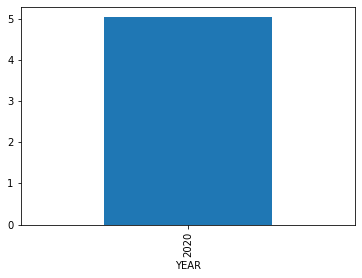

In [9]:
#Money Gain Per Year
dataFrame.groupby(["YEAR"])["GAINAT"].sum().plot(kind='bar')

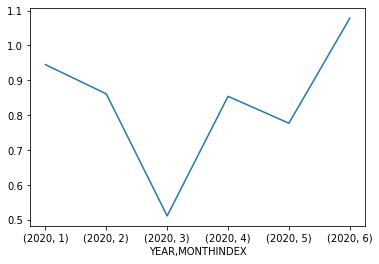

In [10]:
#Money Gain Per Year / Month
gpm = dataFrame.groupby(["YEAR","MONTHINDEX"])["GAINAT"]
gpm.sum().plot(kind='line')

In [11]:
#Money Gain Per Year / Month
gpm = dataFrame.groupby(["YEAR","MONTHINDEX"])["GAINAT"]
gpm.sum()

YEAR  MONTHINDEX
2020  1             0.945
      2             0.861
      3             0.511
      4             0.854
      5             0.777
      6             1.078
Name: GAINAT, dtype: float64

In [12]:
#Money Gain Per Storie
dataFrame.groupby(["STORY"])["GAINAT"].sum()

STORY
A brief intro to Swift packages             0.014
Getting Started With TDD                    4.977
You think you were right, Think Again...    0.035
Name: GAINAT, dtype: float64

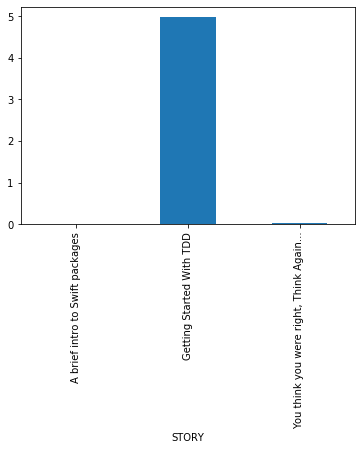

In [13]:
#Money Gain Per Storie
dataFrame.groupby(["STORY"])["GAINAT"].sum().plot(kind='bar')